#**Import libraries**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [ ]:
import keras # main keras package
from keras.models import Sequential # sequential model
from keras.layers import Dropout, Flatten, AveragePooling2D,MaxPool2D # layers with layers operations
from keras.layers import Dense,Conv2D  # layers types
from keras.layers import BatchNormalization

print("Keras version:", keras.__version__)

Keras version: 2.12.0


In [ ]:
import numpy as np 
import pandas as pd
import os, time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import applications
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten , AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import LeakyReLU
import os
import warnings
warnings.filterwarnings('ignore')

#**Import Data**

In [ ]:
#import train file
df = pd.read_csv('/content/drive/MyDrive/Copy of fashion-mnist_train (1).csv')
#import test file
df2 = pd.read_csv('/content/drive/MyDrive/Copy of fashion-mnist_test.csv')

#**Explore Data**

In [ ]:
#display number of rows & columns in train file
print("Fashion MNIST train -  rows:",df.shape[0]," columns:", df.shape[1])
#display number of rows & columns in test file
print("Fashion MNIST test -  rows:",df2.shape[0]," columns:", df2.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#display head of train file
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#display head of test file
df2.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#display some data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
#display the type of data
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [ ]:
#describe train file to know some statistical information about it
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [ ]:
#check missing values
df.isnull().sum().any()

False

In [ ]:
#check duplicated data
df.duplicated().any()

True

In [ ]:
#display number of duplicated data
df.duplicated().sum()

43

In [ ]:
#remove duplicated data andcheck 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#**Data Visualizations**

*Data Correlation*
---

In [ ]:
#plot correlation between columns
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#display the heatmap to represent correlation intensity
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr())

*Label for each class*
---

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


*Data Distribution*
---

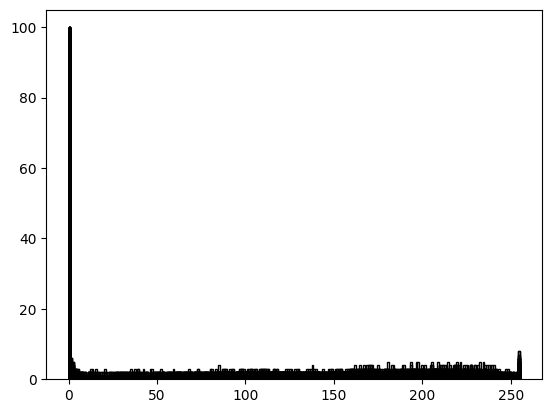

In [ ]:
subset_1 = df.iloc[:100,1:]
plt.subplots()
plt.hist(subset_1, bins=256, fc='k', ec='k',histtype='step')
plt.show()

*Display Some Images*
---

In [ ]:
#function to display some images

def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(2)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(df)


Total number of sample images to plot:  20


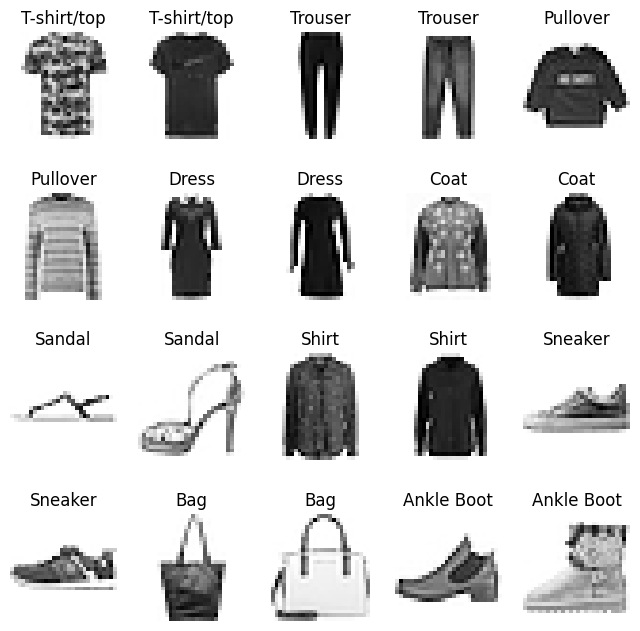

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Greys"):
    # Plot the sample images now
    f, ax = plt.subplots(4,5, figsize=(8,8))

    for i, img in enumerate(data_sample_images):
        ax[i//5, i%5].imshow(img, cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title(labels[data_sample_labels[i]])
    plt.show()    

#display some train images
plot_sample_images(train_sample_images,train_sample_labels, "Greys")

Total number of sample images to plot:  20


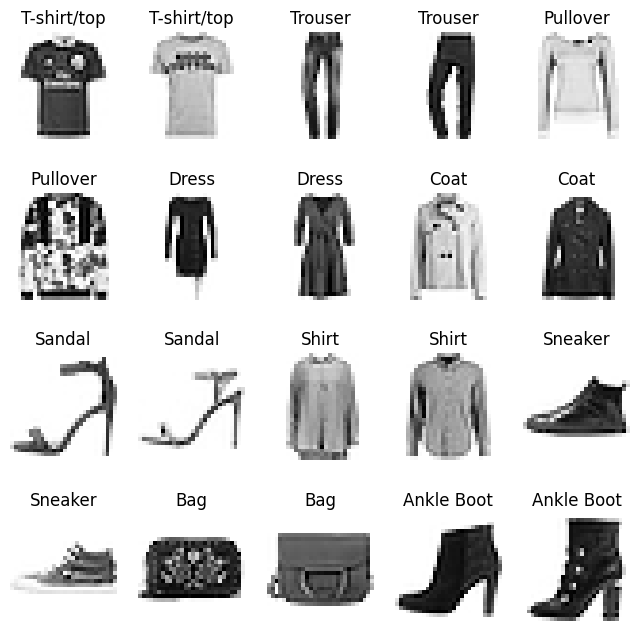

In [ ]:
#display some test images
test_sample_images, test_sample_labels = sample_images_data(df2)
plot_sample_images(test_sample_images,test_sample_labels,"Greys")

#1. LeNet-5 Model


In [ ]:
# data preprocessing (reshape images and make normalization on them)
from keras.utils.np_utils import to_categorical

def data_preprocessing(data):
    y = to_categorical(data.label, 10)
    num_images = data.shape[0]
    x_as_array = data.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    X = x_shaped_array / 255
    return X, y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# prepare the data
X, y = data_preprocessing(df)
X_test, y_test = data_preprocessing(df2)

In [ ]:
#shape of training data features
X.shape

(59957, 28, 28, 1)

In [ ]:
#shape of training data labels
y.shape

(59957, 10)

#Basic LeNET-5

In [ ]:
# data preprocessing (reshape images and make normalization on them)
from keras.utils.np_utils import to_categorical

def data_preprocessing(data):
    y = to_categorical(data.label, 10)
    num_images = data.shape[0]
    x_as_array = data.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    X = x_shaped_array / 255
    return X, y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# prepare the data
X, y = data_preprocessing(df)
X_test, y_test = data_preprocessing(df2)

##**1.1) Defining the CNN architecture - LeNET:**

Adjustments on original structure:

1) activation function:'relu' instead of 'tansh'

2) diferent hidden units

3) max pooling layers instead of average pooling

In [ ]:
num_classes = 10

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

##**1.2) Summarising model**

It is worth to summarise the model to see how many trainable parameters our model contains - this has a direct impact on computational power required.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

##**1.3) Compiling model**

CNN model has now to be compiled. To do so we will use:

- ADAM (ADAptive Moment estimation) **optimiser** 

- My **loss function** will be categorical_crossentropy 
  
- Metric will be accuracy


In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

##**1.4) Fitting model to training data**

After the model was checked it is time to fit it to the training data. 

We will store the fitted model in history variable to later investigate its history.

**Configure Training & Validation (K-Fold) Properties**




In [ ]:
k = 5
cross_val = KFold(k, shuffle=True, random_state=10)
fold_count = 1

# For training epochs
epochs = 35

# For loss & acc plotting
histories = []

# For testing/evaluation acc scores
eval_scores = []

# For callbacks
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",
                                          mode="min",
                                          verbose=1,
                                          patience=4)


**Start Training and Validation**

In [ ]:
for train, validation in cross_val.split(X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    
    # model = sequential_model(input_shape)
    
    X_train, y_train = X[train], y[train]
    X_val, y_val = X[validation], y[validation]
    
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=521,
                        validation_data=(X_val, y_val),
                        callbacks=[es_callbacks])
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
    
    histories.append(history)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/35
93/93 [==============================] - 4s 31ms/step - loss: 0.7817 - accuracy: 0.7237 - val_loss: 0.5410 - val_accuracy: 0.8075
Epoch 2/35
93/93 [==============================] - 2s 26ms/step - loss: 0.4514 - accuracy: 0.8366 - val_loss: 0.3968 - val_accuracy: 0.8591
Epoch 3/35
93/93 [==============================] - 3s 27ms/step - loss: 0.3762 - accuracy: 0.8671 - val_loss: 0.3556 - val_accuracy: 0.8727
Epoch 4/35
93/93 [==============================] - 3s 27ms/step - loss: 0.3357 - accuracy: 0.8801 - val_loss: 0.3509 - val_accuracy: 0.8712
Epoch 5/35
93/93 [==============================] - 2s 26ms/step - loss: 0.3080 - accuracy: 0.8906 - val_loss: 0.3126 - val_accuracy: 0.8894
Epoch 6/35
93/93 [==============================] - 2s 26ms/step - loss: 0.2852 - accuracy: 0.8990 - val_loss: 0.3093 - val_accuracy: 0.8868
Epoch 7/35
93/93 [==========================

##**1.5) Tracking Learning**

It is possible to monitor the learning process of our model by accessing its history with (.history) attribute of previously defined History.

It is worth looking at how the loss function was developing for both testing and validation sets. It is possible to spot if we have already a problem with overfitting - test set loss function will be decreasing while validation's loss function after reaching a minimum value starts to increase again.

**Visualizing loss and accuracy graphs from every fold.**

In [ ]:
def display_kfold_result(history, k=1):
    # Train & Val Loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Validation")
    plt.legend(loc="upper right")
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Validation")
    plt.legend(loc="lower right")
    
    plt.suptitle("Fold-{}".format(k))
    plt.show()

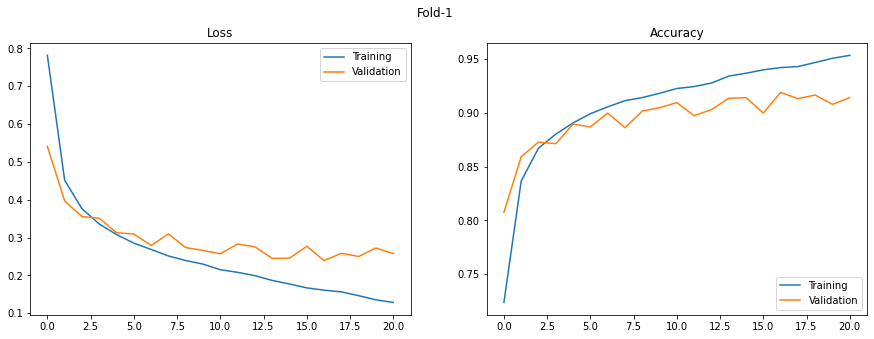

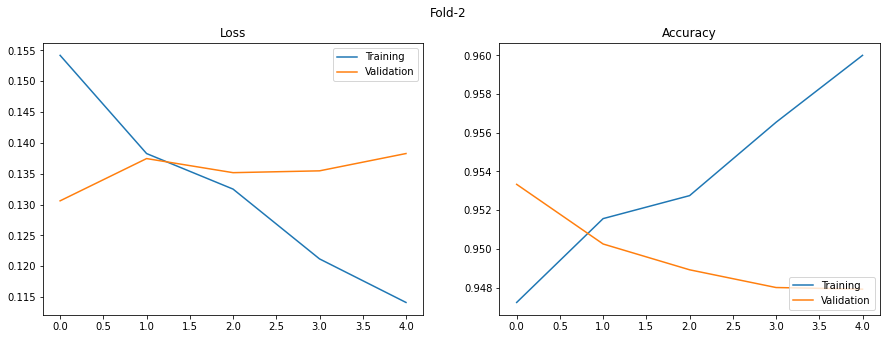

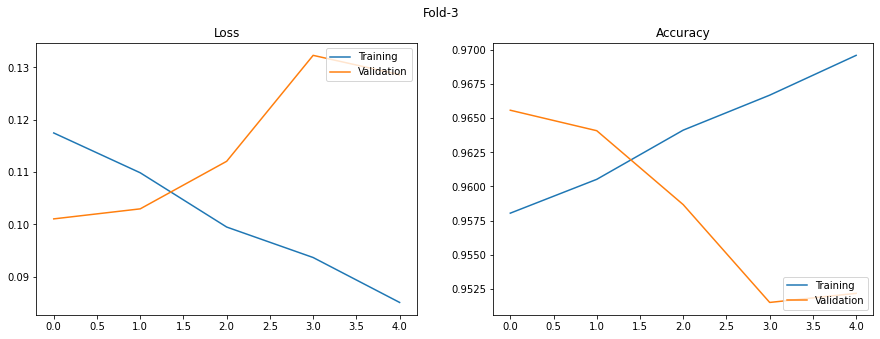

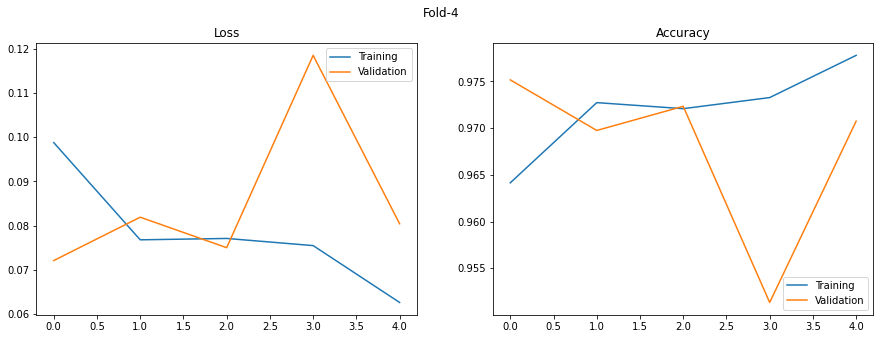

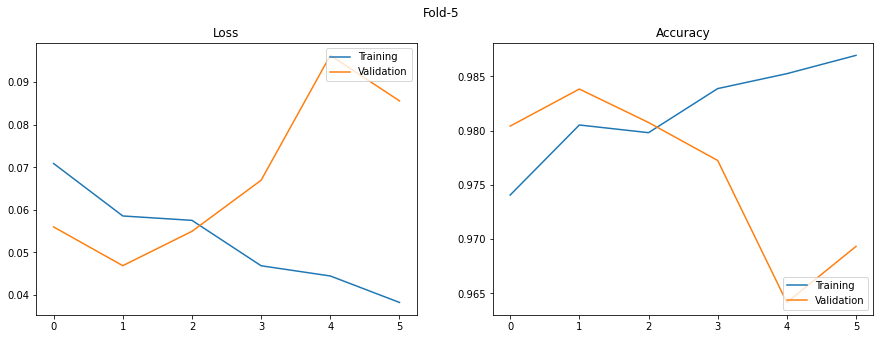

In [ ]:
# Displaying the graph results
for history in histories:
    display_kfold_result(history, (histories.index(history)+1))

In [ ]:
i = 0
float2 = "{0:.2f}"
for score in eval_scores:
    percent = score * 100
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))
    i = i + 1

Fold-1: 91.77%
Fold-2: 92.03%
Fold-3: 92.17%
Fold-4: 92.11%
Fold-5: 91.67%


## Model With Enhancements 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=84, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

## Fitting model to training data



Configure Training & Validation (K-Fold)




In [ ]:
k = 5
cross_val = KFold(k, shuffle=True, random_state=10)
fold_count = 1

# For training epochs
epochs = 40

# For loss & acc plotting
histories = []

# For testing/evaluation acc scores
eval_scores = []

# For callbacks
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",
                                          mode="min",
                                          verbose=1,
                                          patience=4)


**Start Training and Validation**

In [ ]:
for train, validation in cross_val.split(X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    
    # model = sequential_model(input_shape)
    
    X_train, y_train = X[train], y[train]
    X_val, y_val = X[validation], y[validation]
    
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=521,
                        validation_data=(X_val, y_val),
                        callbacks=[es_callbacks])
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
    
    histories.append(history)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/40
93/93 [==============================] - 15s 22ms/step - loss: 1.0304 - accuracy: 0.6573 - val_loss: 0.6509 - val_accuracy: 0.7492
Epoch 2/40
93/93 [==============================] - 1s 11ms/step - loss: 0.5661 - accuracy: 0.7886 - val_loss: 0.5484 - val_accuracy: 0.7952
Epoch 3/40
93/93 [==============================] - 1s 8ms/step - loss: 0.4988 - accuracy: 0.8183 - val_loss: 0.4847 - val_accuracy: 0.8277
Epoch 4/40
93/93 [==============================] - 1s 7ms/step - loss: 0.4556 - accuracy: 0.8370 - val_loss: 0.4661 - val_accuracy: 0.8336
Epoch 5/40
93/93 [==============================] - 1s 8ms/step - loss: 0.4338 - accuracy: 0.8458 - val_loss: 0.4243 - val_accuracy: 0.8480
Epoch 6/40
93/93 [==============================] - 1s 8ms/step - loss: 0.4128 - accuracy: 0.8540 - val_loss: 0.4031 - val_accuracy: 0.8570
Epoch 7/40
93/93 [=============================

## Tracking Learning


**Visualizing loss and accuracy graphs from every fold.**

In [ ]:
def display_kfold_result(history, k=1):
    # Train & Val Loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Validation")
    plt.legend(loc="upper right")
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Validation")
    plt.legend(loc="lower right")
    
    plt.suptitle("Fold-{}".format(k))
    plt.show()

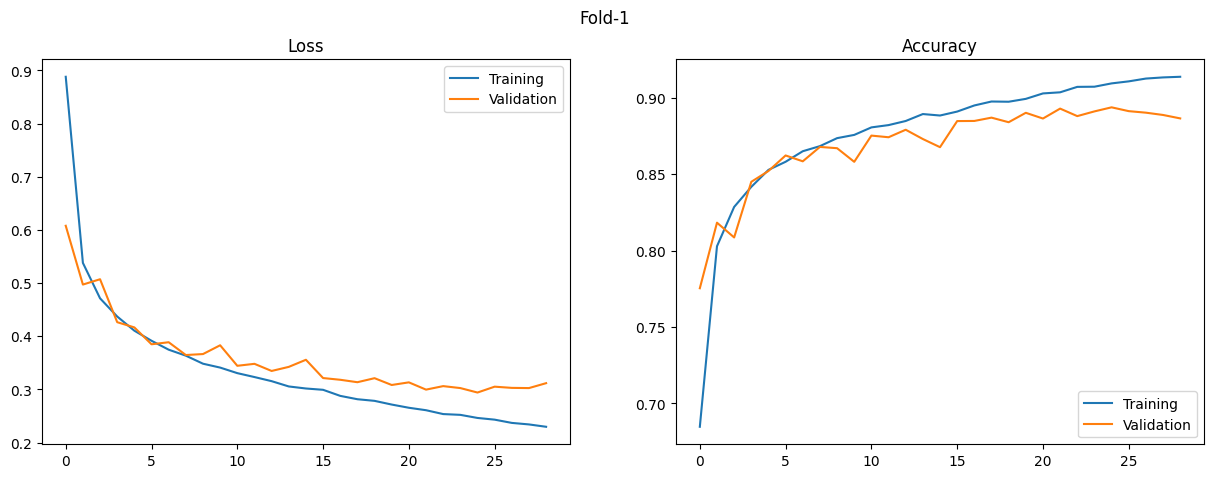

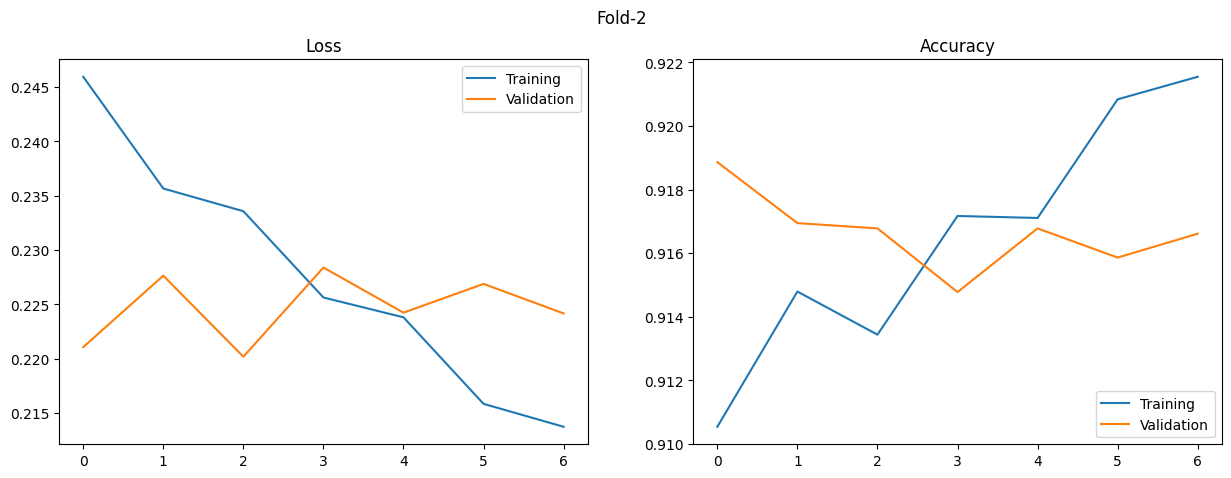

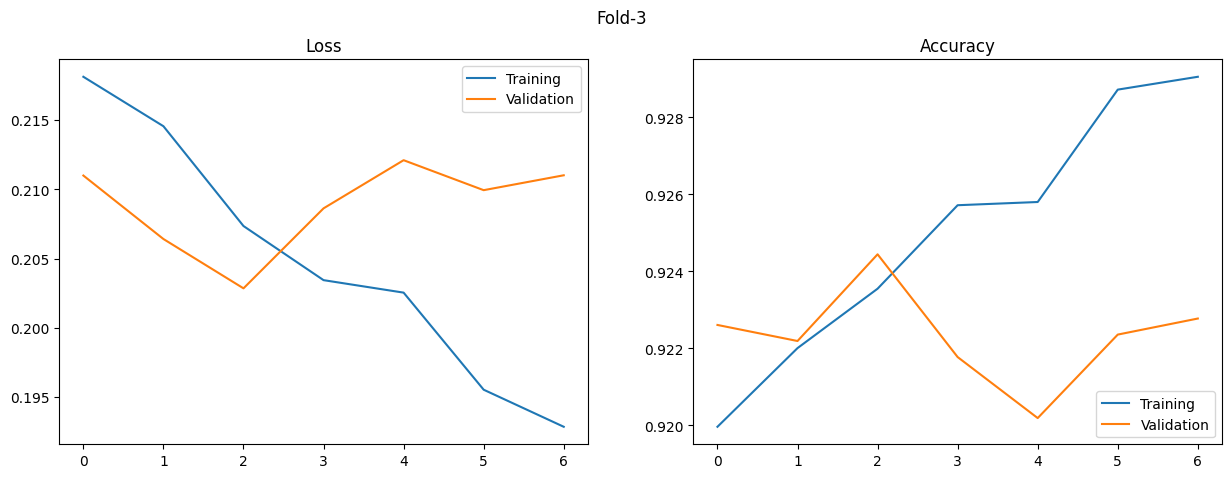

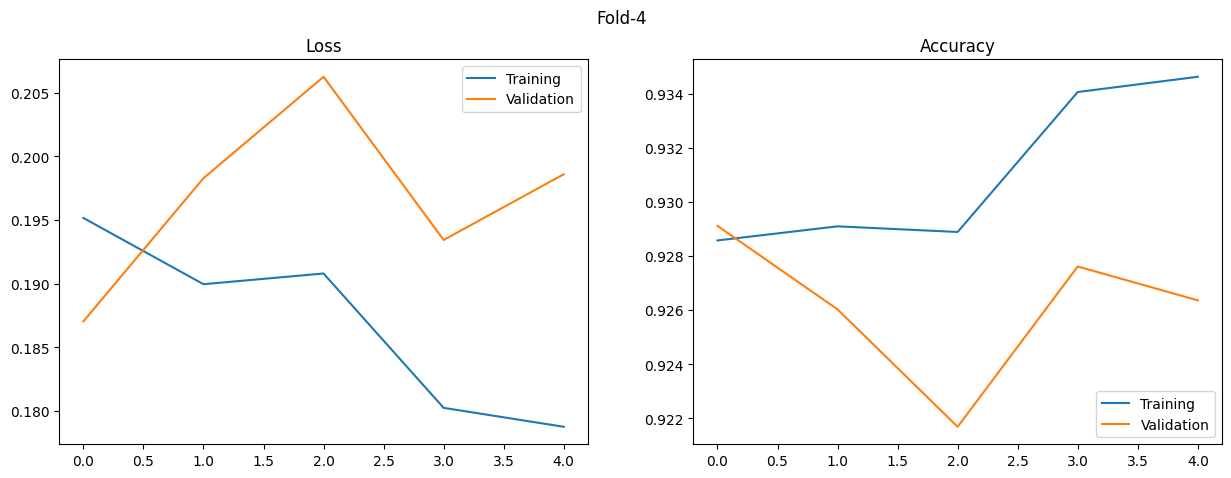

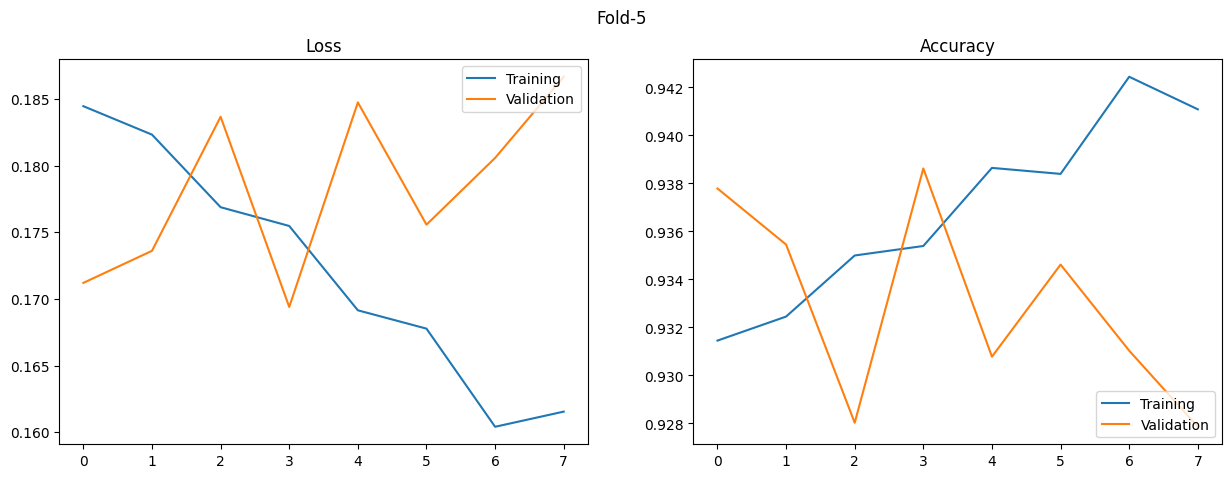

In [ ]:
# Displaying the graph results
for history in histories:
    display_kfold_result(history, (histories.index(history)+1))

##**Display Testing/Evaluation Accuracies**

In [ ]:
i = 0
float2 = "{0:.2f}"
for score in eval_scores:
    percent = score * 100
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))
    i = i + 1

Fold-1: 89.07%
Fold-2: 90.32%
Fold-3: 90.49%
Fold-4: 90.43%
Fold-5: 90.63%


##LeNet-5 Model with more Enhancements





In [ ]:
# data preprocessing (reshape images and make normalization on them)
from keras.utils.np_utils import to_categorical

def data_preprocessing(data):
    y = to_categorical(data.label, 10)
    num_images = data.shape[0]
    x_as_array = data.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    X = x_shaped_array / 255
    return X, y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# prepare the data
X, y = data_preprocessing(df)
X_test, y_test = data_preprocessing(df2)

In [ ]:
#shape of training data features
X.shape

(59957, 28, 28, 1)

In [ ]:
#shape of training data labels
y.shape

(59957, 10)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import LearningRateScheduler

def build_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(84, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

# data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=False)

# learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * np.exp(0.1 * (10 - epoch))

# compile model
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

### Fitting model to training data


**Configure Training & Validation (K-Fold) Properties**




In [ ]:
k = 5
cross_val = KFold(k, shuffle=True, random_state=10)
fold_count = 1

# For training epochs
epochs = 35

# For loss & acc plotting
histories = []

# For testing/evaluation acc scores
eval_scores = []

# For callbacks
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",
                                          mode="min",
                                          verbose=1,
                                          patience=4)


**Start Training and Validation**

In [ ]:
for train, validation in cross_val.split(X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    
    # model = sequential_model(input_shape)
    
    X_train, y_train = X[train], y[train]
    X_val, y_val = X[validation], y[validation]
    
    history = model.fit(datagen.flow(X_train, y_train, batch_size=521), epochs=40, validation_data=(X_val, y_val), callbacks=[LearningRateScheduler(lr_scheduler)])
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
    
    histories.append(history)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-2
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/40
93/93 [==============================] - 15s 155ms/step - loss: 0.3009 - accuracy: 0.8915 - val_loss: 0.2796 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 2/40
93/93 [==============================] - 15s 156ms/step - loss: 0.2897 - accuracy: 0.8947 - val_loss: 0.2491 - val_accuracy: 0.9087 - lr: 0.0010
Epoch 3/40
93/93 [==============================] - 15s 159ms/step - loss: 0.2861 - accuracy: 0.8960 - val_loss: 0.2500 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 4/40
93/93 [==============================] - 15s 159ms/step - loss: 0.2860 - accuracy: 0.8974 - val_loss: 0.2439 - val_accuracy: 0.9087 - lr: 0.0010
Epoch 5/40
93/93 [==============================] - 15s 159ms/step - loss: 0.2846 - accuracy: 0.8981 - val_loss: 0.2511 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 6/40
93/93 [==============================] - 15s 160ms/step - loss: 0.2800 - accuracy: 0.8986 - val_los

###Tracking Learning


**Visualizing loss and accuracy graphs from every fold.**

In [ ]:
def display_kfold_result(history, k=1):
    # Train & Val Loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Validation")
    plt.legend(loc="upper right")
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Validation")
    plt.legend(loc="lower right")
    
    plt.suptitle("Fold-{}".format(k))
    plt.show()

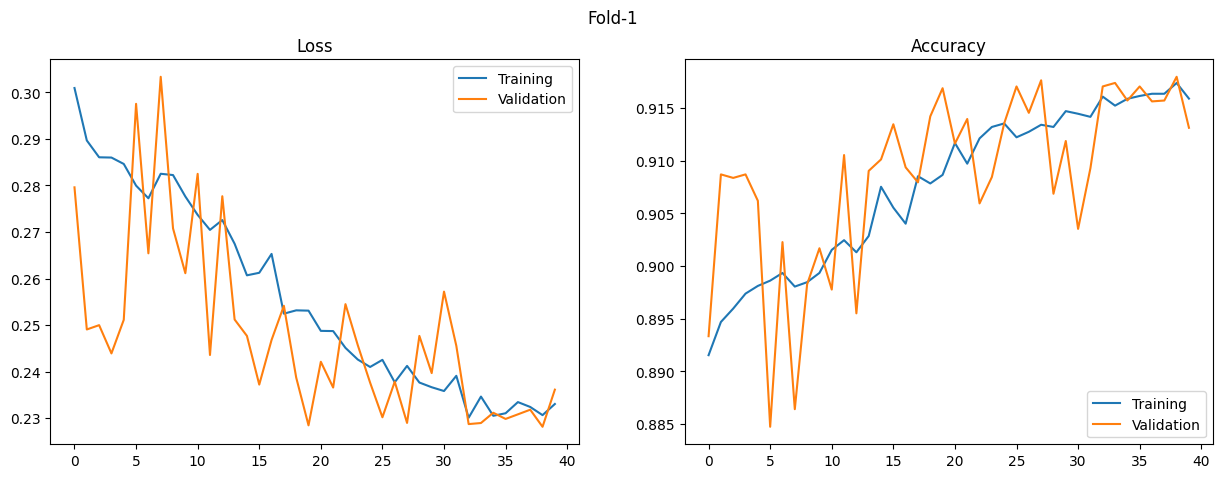

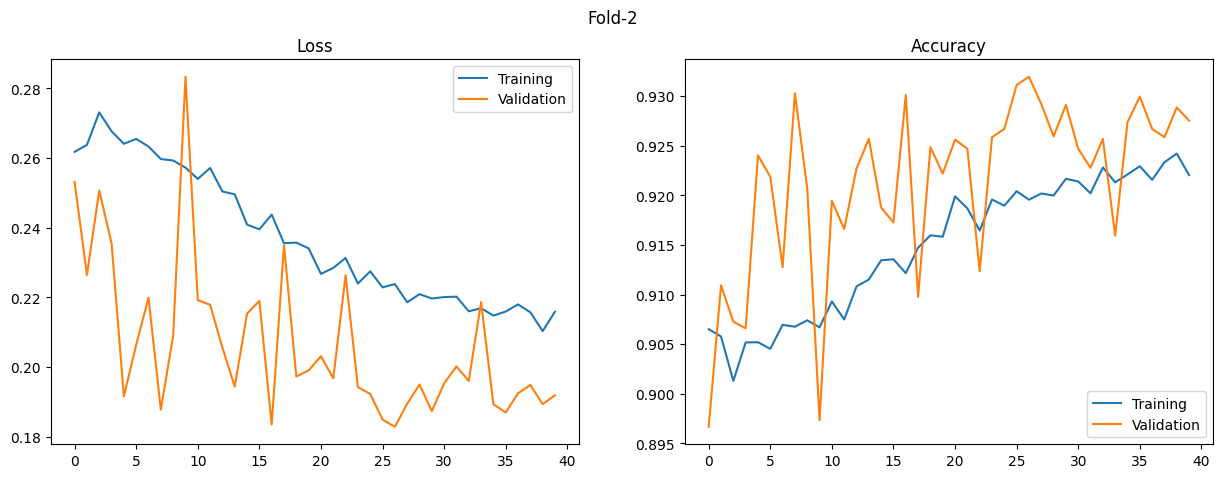

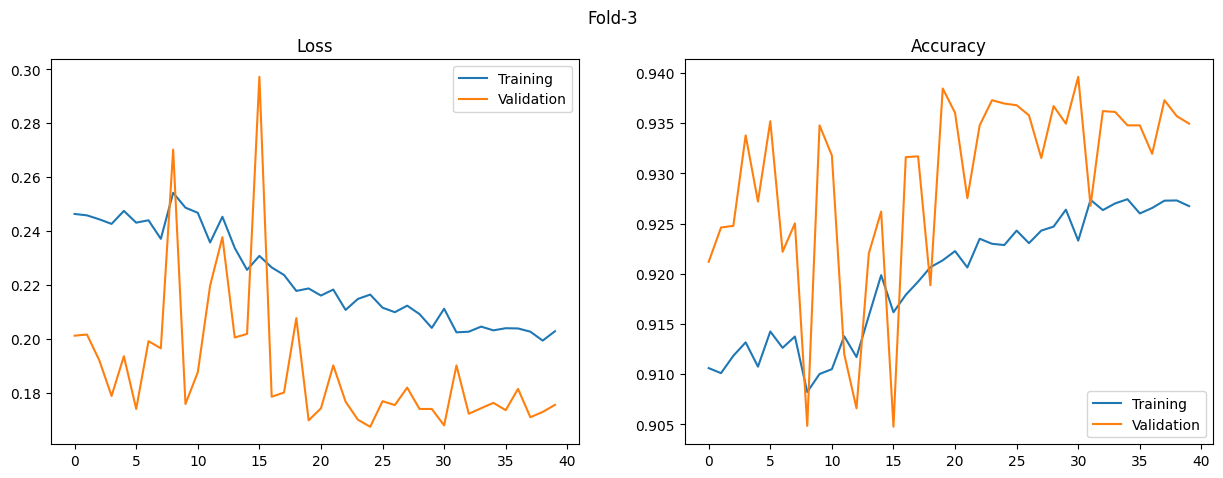

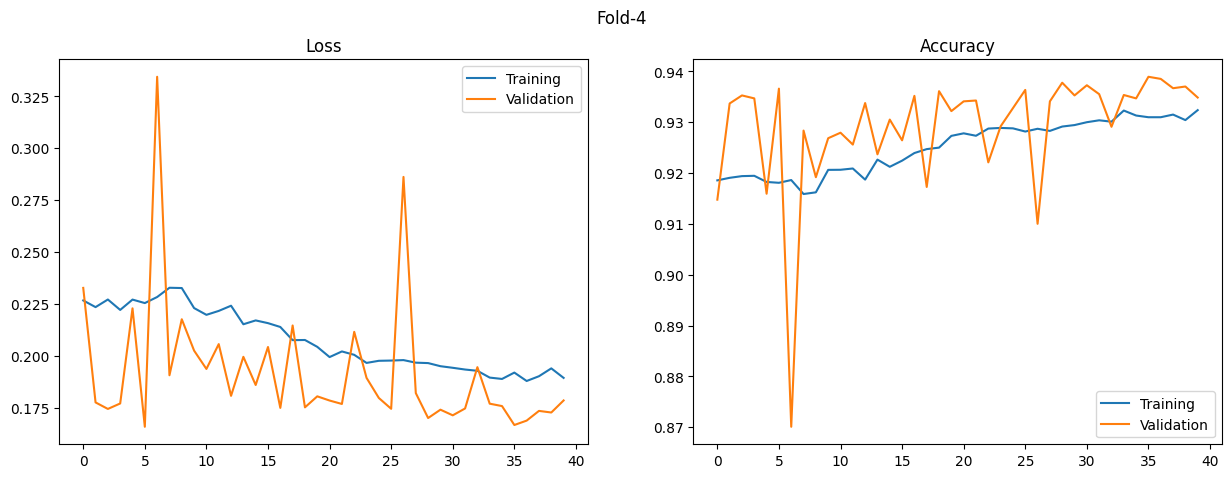

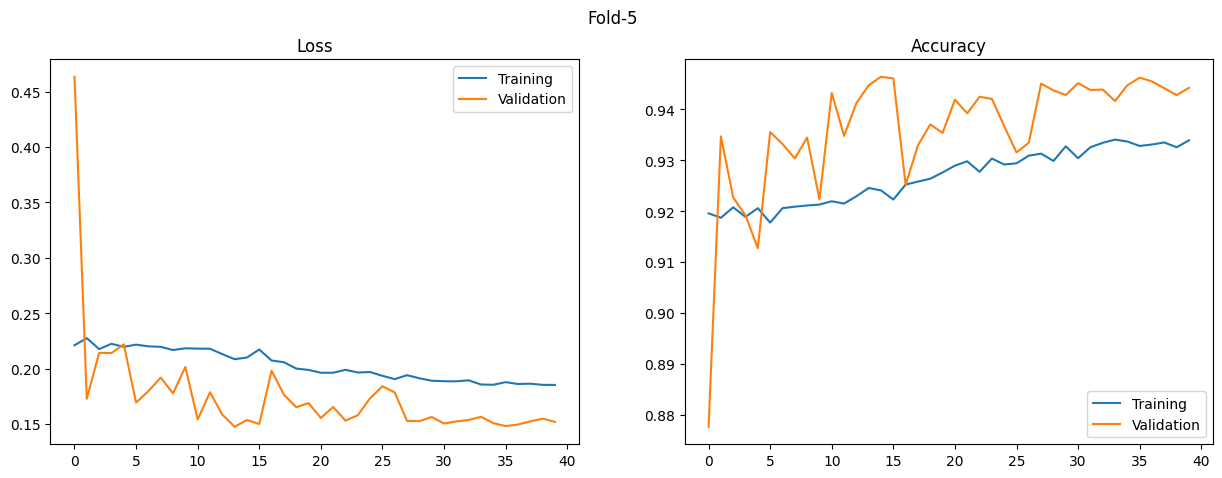

In [ ]:
# Displaying the graph results
for history in histories:
    display_kfold_result(history, (histories.index(history)+1))

##**Display Testing/Evaluation Accuracies**

In [ ]:
i = 0
float2 = "{0:.2f}"
for score in eval_scores:
    percent = score * 100
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))
    i = i + 1

Fold-1: 91.81%
Fold-2: 92.50%
Fold-3: 92.29%
Fold-4: 92.52%
Fold-5: 93.07%


## VGG19 Model

* Input: Flattened 784 px grayscale images, which can be represented as dimension (n, 48, 48, 3)
* Output: 0 - 9

In [ ]:
#take copy from train & test files
df_vgg =df.copy()
df2_vgg =df2.copy()

##**Split Data**

In [ ]:
#split train & test data to features and labels
x_train_vgg= np.array(df_vgg.iloc[:,1:])
y_train_vgg= np.array (df_vgg.iloc[:,0]) 

x_test_vgg= np.array(df2_vgg.iloc[:,1:])
y_test_vgg = np.array(df2_vgg.iloc[:,0]) 


##**Preprocessing**

*Unique values in target variable*

In [ ]:
classes = np.unique(y_train_vgg)
num_classes = len(classes)
num_classes

10

*Convert the images into 3 channels*

In [ ]:

# Convert grayscale images to RGB by duplicating the single channel 3 times
x_train_vgg = np.dstack([x_train_vgg] * 3) # stack 3 copies of each grayscale image along the depth axis to create a 3-channel RGB image
x_test_vgg = np.dstack([x_test_vgg] * 3) # stack 3 copies of each grayscale image along the depth axis to create a 3-channel RGB image

# Print the shape of the training and testing datasets after the conversion
print("Training dataset shape:", x_train_vgg.shape) # print the shape of the training dataset which should now have 3 channels
print("Testing dataset shape:", x_test_vgg.shape) # print the shape of the testing dataset which should now have 3 channels


((60000, 784, 3), (10000, 784, 3))

*Reshape images as per the tensor format required by tensorflow*

In [ ]:
# reshape the training data from 2D grayscale to 3D RGB
x_train_vgg = x_train_vgg.reshape(-1, 28, 28, 3)

# reshape the testing data from 2D grayscale to 3D RGB
x_test_vgg = x_test_vgg.reshape(-1, 28, 28, 3)

# print the shapes of the training and testing data after reshaping
print("Training dataset shape:", x_train_vgg.shape)
print("Testing dataset shape:", x_test_vgg.shape)


((60000, 28, 28, 3), (10000, 28, 28, 3))

*Resize the images (48,48) as required by VGG19*




In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
x_train_vgg = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_vgg])
x_test_vgg = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_vgg])

#shape after converting to size(48,48)
x_train_vgg.shape, x_test_vgg.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

*Normalise the data and change data type*

In [ ]:
x_train_vgg = x_train_vgg / 255.
x_test_vgg = x_test_vgg / 255.
x_train_vgg = x_train_vgg.astype('float32')
x_test_vgg = x_test_vgg.astype('float32')

*Converting Labels to one hot encoded format*

In [ ]:
y_train_vgg_one_hot = to_categorical(y_train_vgg)
y_test_vgg_one_hot = to_categorical(y_test_vgg)

In [ ]:
y_test_vgg_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

*Define the parameters for instanitaing VGG19 model*

In [ ]:
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

*Preprocessing the input*

In [ ]:
x_train_vgg = preprocess_input(x_train_vgg)
x_test_vgg  = preprocess_input (x_test_vgg)

###**2.1.1) Create base model of VGG19**


In [ ]:
conv_base = VGG19(weights="imagenet",
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
train_features = conv_base.predict(np.array(x_train_vgg), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(x_test_vgg), batch_size=BATCH_SIZE, verbose=1)

625/625 [==============================] - 5s 9ms/step


In [ ]:
np.savez("train_features", train_features, y_train_vgg_one_hot)
np.savez("test_features", test_features, y_test_vgg_one_hot)

In [ ]:
print(train_features.shape, "\n",  test_features.shape)

(60000, 1, 1, 512) 
 (10000, 1, 1, 512)


In [ ]:
train_features_flat = np.reshape(train_features, (60000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))

In [ ]:
# Get the number of training samples
NB_TRAIN_SAMPLES = train_features_flat.shape[0]

# Create a sequential model
model = models.Sequential()

# Add a dense layer with 512 units, using the ReLU activation function
# and input dimension of 1*1*512
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))

# Add a batch normalization layer to normalize the activations of the previous layer
model.add(layers.BatchNormalization())

# Add a dense layer with 256 units, using the ReLU activation function
model.add(layers.Dense(256, activation='relu'))

# Add a LeakyReLU activation function with an alpha value of 0.1 to introduce some non-linearity
model.add(layers.LeakyReLU(alpha=0.1))

# Add a dense layer with 128 units, using the ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add a batch normalization layer to normalize the activations of the previous layer
model.add(layers.BatchNormalization())

# Add a dense layer with 10 units, using the softmax activation function to get the probabilities of the 10 classes
model.add(layers.Dense(10, activation='softmax'))

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

## **2.2) Compile the model**

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="Adam",
    metrics=['accuracy'])

##**2.3) Fitting model to training data**

After the model was checked it is time to fit it to the training data. 

We will store the fitted model in history variable to later investigate its history.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set random seed for reproducibility
seed = 7

# Number of folds for cross-validation
k = 5

# K-fold cross-validation object
cross_val = KFold(k, shuffle=True, random_state=seed)

# Number of training epochs
epochs = 35

# List to store loss and accuracy history for each fold
histories = []

# List to store evaluation accuracy score for each fold
eval_scores = []

# Define ReduceLROnPlateau callback to adjust learning rate dynamically
reduce_learning = ReduceLROnPlateau(
    monitor='val_loss',     # monitor validation loss
    factor=0.2,             # reduce learning rate by a factor of 0.2
    patience=2,             # if validation loss doesn't improve for 2 epochs
    verbose=1,              # print a message when learning rate is reduced
    mode='auto',            # determine direction of loss improvement automatically
    cooldown=2,             # wait for 2 epochs before reducing learning rate again
    min_lr=0                # set a lower bound on the learning rate
)

# Define EarlyStopping callback to stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',     # monitor validation loss
    min_delta=0,            # minimum change in loss to qualify as an improvement
    patience=7,             # wait for 7 epochs before stopping training
    verbose=1,              # print a message when training is stopped early
    mode='auto'             # determine direction of loss improvement automatically
)

# Combine the two callbacks into a list
callbacks = [reduce_learning, early_stopping]


**Start Training and Validation**

In [ ]:
for train, validation in cross_val.split(train_features_flat):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    
    # model = sequential_model(input_shape)
    
    X_train, y_train = train_features_flat[train], y_train_vgg_one_hot[train]
    X_val, y_val = train_features_flat[validation], y_train_vgg_one_hot[validation]
    
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=256,
                        validation_data=(X_val, y_val),
                        callbacks=[callbacks])
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(test_features_flat, y_test_vgg_one_hot)
    
    histories.append(history)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/35
188/188 [==============================] - 6s 7ms/step - loss: 0.6984 - accuracy: 0.7541 - val_loss: 6.0940 - val_accuracy: 0.1766 - lr: 0.0010
Epoch 2/35
188/188 [==============================] - 1s 6ms/step - loss: 0.5551 - accuracy: 0.7966 - val_loss: 2.2052 - val_accuracy: 0.2947 - lr: 0.0010
Epoch 3/35
188/188 [==============================] - 1s 6ms/step - loss: 0.5124 - accuracy: 0.8119 - val_loss: 7.8027 - val_accuracy: 0.1733 - lr: 0.0010
Epoch 4/35
188/188 [==============================] - ETA: 0s - loss: 0.4906 - accuracy: 0.8190
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
188/188 [==============================] - 1s 6ms/step - loss: 0.4906 - accuracy: 0.8190 - val_loss: 23.4516 - val_accuracy: 0.1046 - lr: 0.0010
Epoch 5/35
188/188 [==============================] - 1s 6ms/step - loss: 0.4427 - accuracy: 0.8367 - val_l

##**2.4) Tracking Learning**

It is possible to monitor the learning process of our model by accessing its history with (.history) attribute of previously defined History.

It is worth looking at how the loss function was developing for both testing and validation sets. It is possible to spot if we have already a problem with overfitting - test set loss function will be decreasing while validation's loss function after reaching a minimum value starts to increase again.

In [ ]:
def display_kfold_result(history, k=1):
    # Extract the training loss and validation loss from the history object
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Extract the training accuracy and validation accuracy from the history object
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    # Create a figure with two subplots
    plt.figure(figsize=(15, 5))
    
    # Add the first subplot for the loss plot
    plt.subplot(1, 2, 1)
    plt.title("Loss")  # Set the title for the plot
    plt.plot(loss, label="Training")  # Plot the training loss
    plt.plot(val_loss, label="Validation")  # Plot the validation loss
    plt.legend(loc="upper right")  # Add a legend for the plot
    
    # Add the second subplot for the accuracy plot
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")  # Set the title for the plot
    plt.plot(accuracy, label="Training")  # Plot the training accuracy
    plt.plot(val_accuracy, label="Validation")  # Plot the validation accuracy
    plt.legend(loc="lower right")  # Add a legend for the plot
    
    # Add a main title for the figure that includes the fold number
    plt.suptitle("Fold-{}".format(k))
    
    # Display the figure
    plt.show()


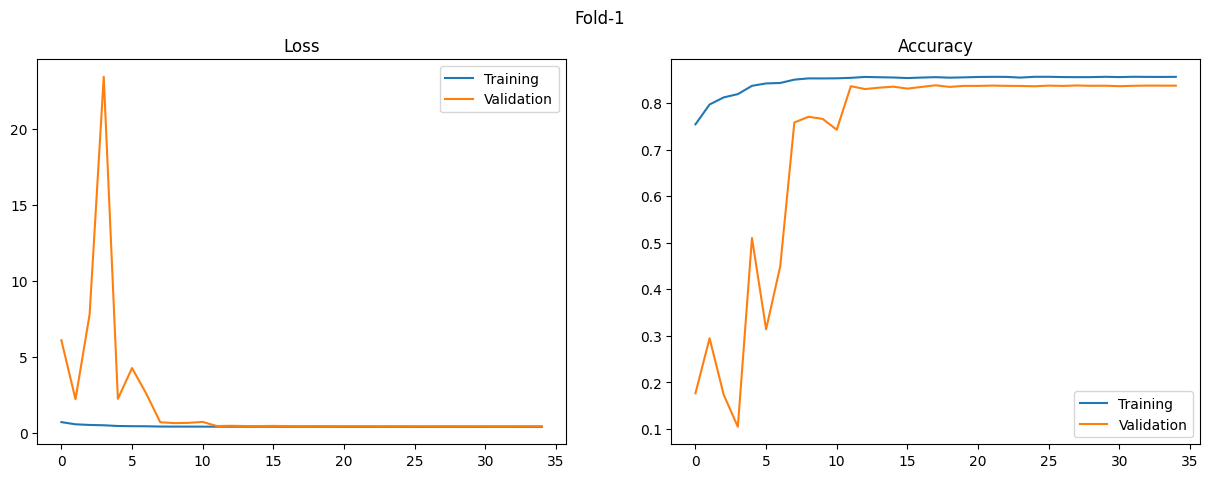

Fold-1 result displayed.


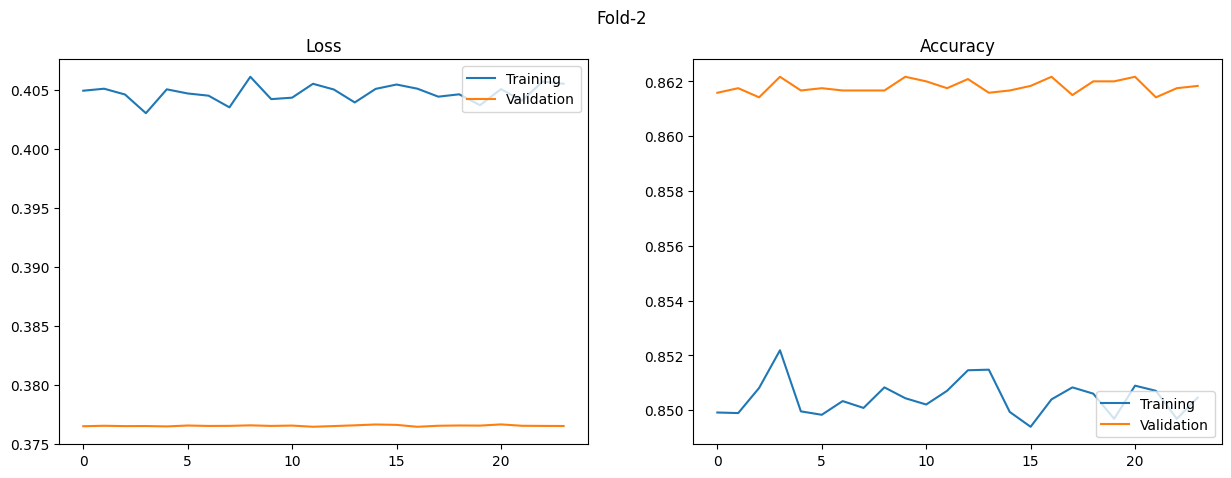

Fold-2 result displayed.


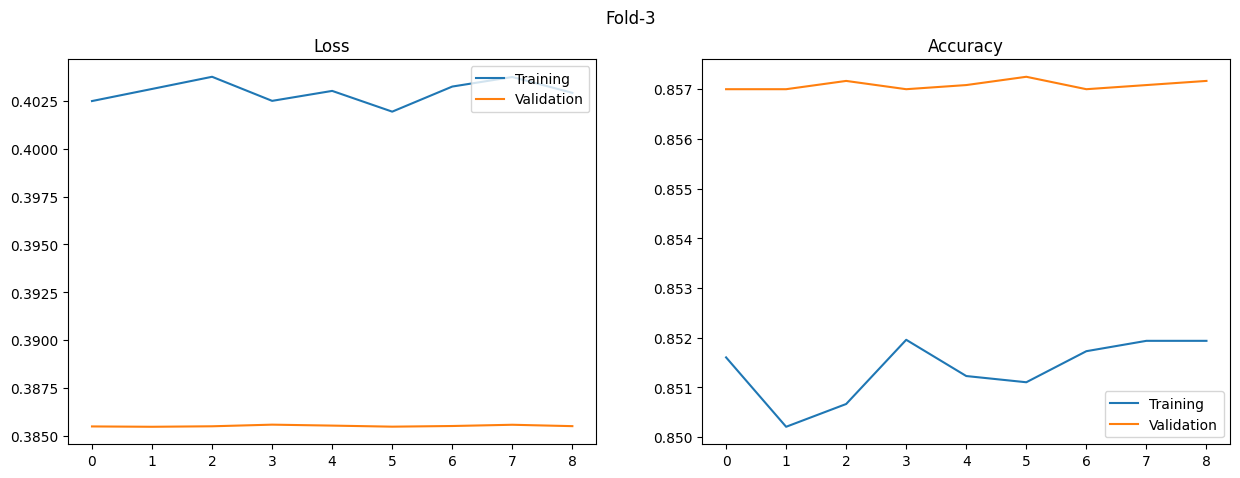

Fold-3 result displayed.


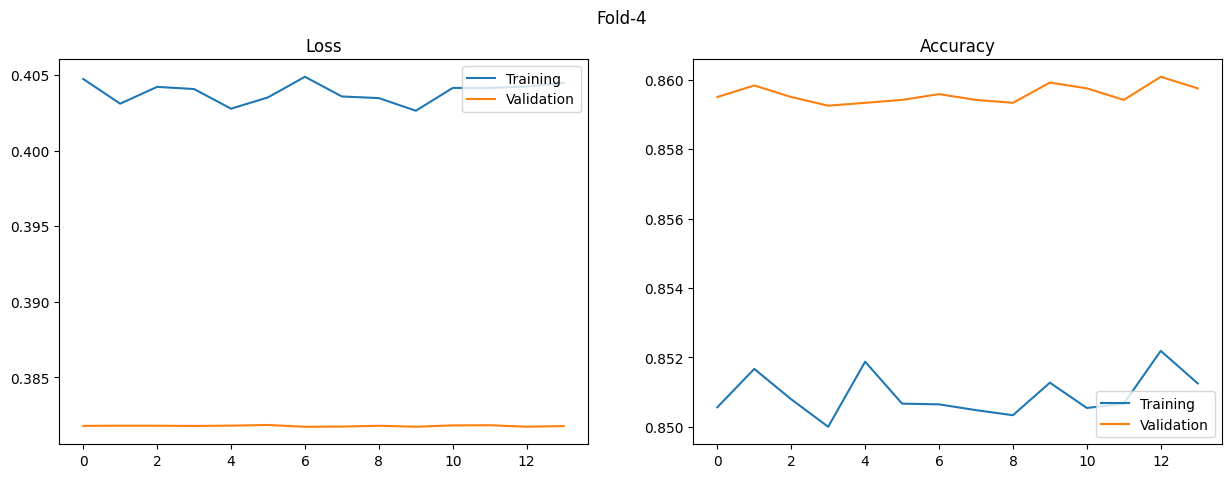

Fold-4 result displayed.


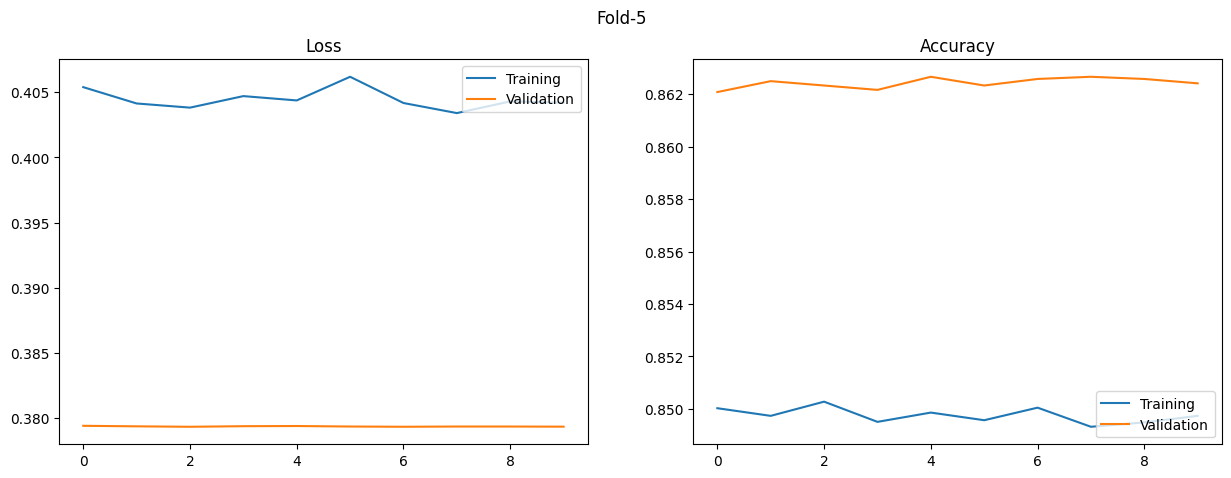

Fold-5 result displayed.


In [ ]:
# Display the graph results for each fold
for i, history in enumerate(histories):
    display_kfold_result(history, k=i+1)
    print(f"Fold-{i+1} result displayed.")


In [ ]:
i = 0  # initialize counter variable to 0
float2 = "{0:.2f}"  # format string for printing percentage values with 2 decimal places

# iterate through the list of evaluation scores
for score in eval_scores:
    percent = score * 100  # convert score to percentage
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))  # print fold number and percentage with 2 decimal places
    i = i + 1  # increment the counter variable by 1


Fold-1: 84.31%
Fold-2: 84.33%
Fold-3: 84.36%
Fold-4: 84.32%
Fold-5: 84.31%
